In [1]:
from itertools import product
import numpy as np
from tqdm import tqdm

In [2]:
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
%matplotlib inline

In [49]:
# game (2 players) settings,
lo, hi = 2, 4

def r1(a1, a2):
    return min(a1, a2) + 2 * np.sign(a2 - a1)

np.random.seed(618)

In [50]:
V1_hist = dict()
k_list = [1, 2, 3]
for k in k_list:
    V1_hist[k] = []

In [51]:
for k in k_list:
    for _ in range(5):
        V1_hist[k].append([])
    
        # strategy settings
        actions = range(lo, hi + 1)
        states = list(map(list, product(actions, repeat=2 * k)))
        
        num_actions = len(actions)
        num_states = len(states)
        R = np.zeros(shape=(num_states, num_actions, num_actions))
        T = np.zeros(shape=(num_states, num_states, num_actions, num_actions))
        print(R.shape, T.shape)
        
        for idx1, a1 in enumerate(actions):
            for idx2, a2 in enumerate(actions):
                R[:, idx1, idx2] = r1(a1, a2)
        
        for idx1, a1 in enumerate(actions):
            for idx2, a2 in enumerate(actions):
                R[:, idx1, idx2] = r1(a1, a2)
        for i, Si in enumerate(states):
            for idx1, a1 in enumerate(actions):
                for idx2, a2 in enumerate(actions):
                    Sj = Si[2:] + [a1, a2]
                    base = [num_actions ** i for i in range(2 * k - 1, -1 , -1)]
                    j = np.dot(np.array(Sj) - lo, base)
                    T[i, j, idx1, idx2] = 1
        
        # initialization
        p1 = np.random.rand(num_states, num_actions)
        p1 = p1 / p1.sum(axis=1, keepdims=True)
        p2 = np.random.rand(num_states, num_actions)
        p2 = p2 / p2.sum(axis=1, keepdims=True)
        
        V1 = np.random.rand(num_states)
        V2 = np.random.rand(num_states)
        
        print(p1.shape, V1.shape)
        
        # refinement mapping iteration
        gamma = 0.95
        it = 20
        for i in tqdm(range(it)):
            R1SA = np.sum(R * p2[:, np.newaxis, :], axis=2)
            T1SAS = np.sum(T * p2[:, np.newaxis, np.newaxis, :], axis=3).transpose(0, 2, 1)
            
            R2SA = np.sum(R * p1[:, np.newaxis, :], axis=2)
            T2SAS = np.sum(T * p1[:, np.newaxis, np.newaxis, :], axis=3).transpose(0, 2, 1)
        
            # solve Bellman expectation equation
            I = np.eye(num_states)
            
            R1S = np.sum(R1SA * p1, axis=1)
            T1SS = np.sum(T1SAS * p1[:, :, np.newaxis], axis=1)
            V1 = np.linalg.inv(I - gamma * T1SS) @ R1S
        
            R2S = np.sum(R2SA * p2, axis=1)
            T2SS = np.sum(T2SAS * p2[:, :, np.newaxis], axis=1)
            V2 = np.linalg.inv(I - gamma * T2SS) @ R2S
        
            # extract Q and refine
            Q1 = R1SA + gamma * T1SAS @ V1
            # V1 = np.sum(Q1 * p1, axis=1))
            ref1 = np.maximum(Q1 - V1[:, np.newaxis], 0)
            p1 = p1 + ref1
            p1 = p1 / p1.sum(axis=1, keepdims=True)
            
            Q2 = R2SA + gamma * T2SAS @ V2
            # V2 = np.sum(Q2 * p2, axis=1)
            ref2 = np.maximum(Q2 - V2[:, np.newaxis], 0)
            p2 = p2 + ref2
            p2 = p2 / p2.sum(axis=1, keepdims=True)
        
            V1_hist[k][-1].append(V1.mean())

(9, 3, 3) (9, 9, 3, 3)
(9, 3) (9,)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 2481.98it/s]


(9, 3, 3) (9, 9, 3, 3)
(9, 3) (9,)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 2528.75it/s]


(9, 3, 3) (9, 9, 3, 3)
(9, 3) (9,)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 3222.79it/s]


(9, 3, 3) (9, 9, 3, 3)
(9, 3) (9,)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 3058.97it/s]


(9, 3, 3) (9, 9, 3, 3)
(9, 3) (9,)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 3358.40it/s]


(81, 3, 3) (81, 81, 3, 3)
(81, 3) (81,)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 594.30it/s]


(81, 3, 3) (81, 81, 3, 3)
(81, 3) (81,)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 581.15it/s]


(81, 3, 3) (81, 81, 3, 3)
(81, 3) (81,)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 509.58it/s]


(81, 3, 3) (81, 81, 3, 3)
(81, 3) (81,)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 525.79it/s]


(81, 3, 3) (81, 81, 3, 3)
(81, 3) (81,)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 563.52it/s]


(729, 3, 3) (729, 729, 3, 3)
(729, 3) (729,)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.72it/s]


(729, 3, 3) (729, 729, 3, 3)
(729, 3) (729,)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.79it/s]


(729, 3, 3) (729, 729, 3, 3)
(729, 3) (729,)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.84it/s]


(729, 3, 3) (729, 729, 3, 3)
(729, 3) (729,)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.62it/s]


(729, 3, 3) (729, 729, 3, 3)
(729, 3) (729,)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  6.14it/s]


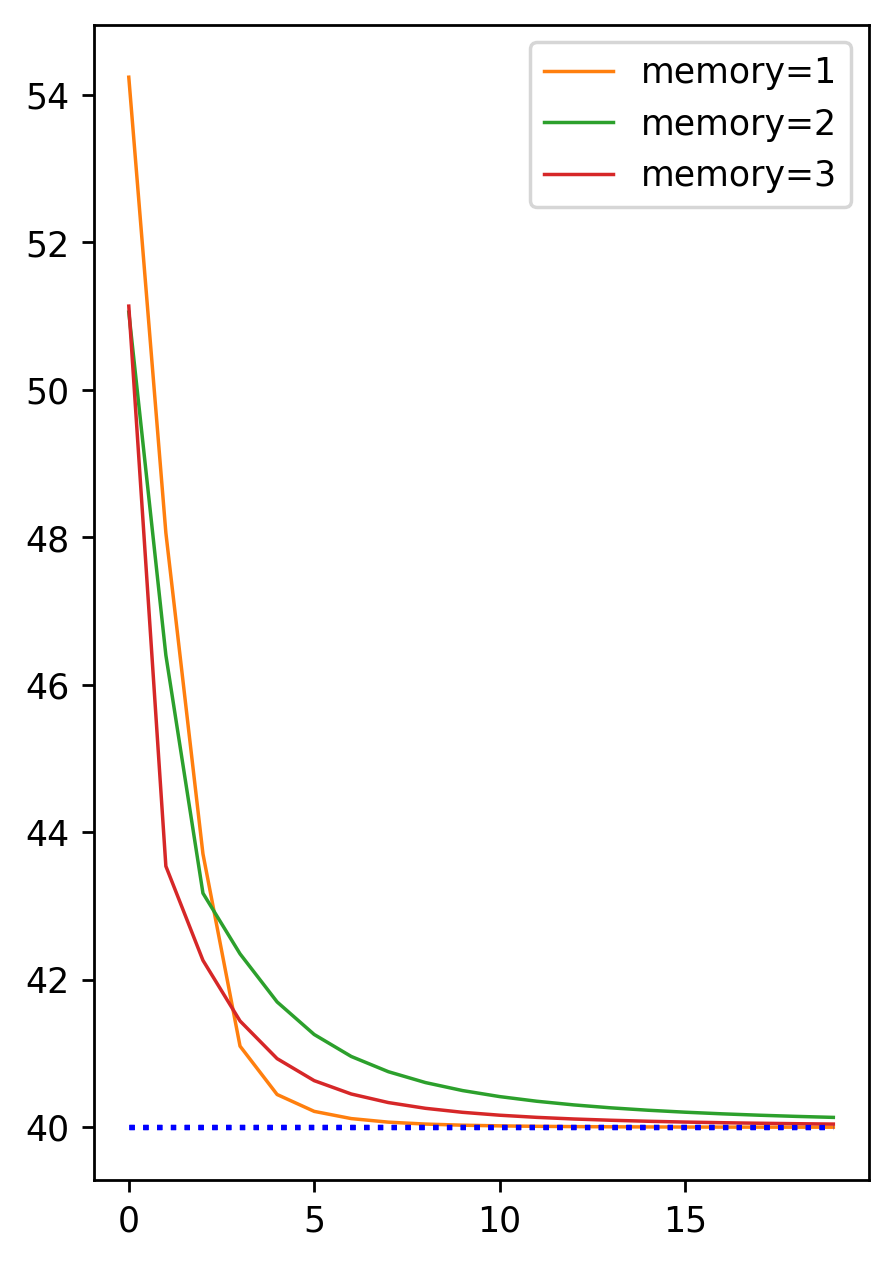

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), dpi=250)
for k in k_list:
    mean = np.mean(V1_hist[k], axis=0)
    std = np.std(V1_hist[k], axis=0)
    ax.plot(range(it), mean, label=f'memory={k}', color=list(mcolors.TABLEAU_COLORS)[k], lw=1)
    # ax.fill_between(range(it), mean - std, mean + std, color=list(mcolors.TABLEAU_COLORS)[k], alpha=0.2, ec=None)
    ax.hlines(40, 0, it - 1, color='b', linestyle='dotted')
    # ax.set_xticks(range(it))
ax.legend()